In [1]:
!pip install numpy matplotlib seaborn scikit-learn pandas

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 660.6 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.9 kB 653.6 kB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 2.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\aida-lab\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Starting MNIST Normalization Techniques Analysis
Loading MNIST dataset...
Dataset shape: (10000, 784)
Training set: (8000, 784)
Test set: (2000, 784)
Pixel value range: [0.00, 255.00]

1. Applying Min-Max Scaling...
2. Applying Standardization...
3. Applying Unit Vector Normalization...
4. Applying Robust Scaling...
5. Applying Log Transformation...
6. Applying Simple Division by 255...

STATISTICAL COMPARISON OF NORMALIZATION TECHNIQUES
       Technique     Min         Max       Mean      Std  Median      Q1   Q3
0       Original  0.0000  255.000000  33.474499  78.7537  0.0000  0.0000  0.0
1         minmax  0.0000    1.000000   0.131300   0.3089  0.0000  0.0000  0.0
2       standard -1.2976   89.437103  -0.000000   0.9238 -0.0633 -0.3355  0.0
3    unit_vector  0.0000    0.258800   0.013800   0.0329  0.0000  0.0000  0.0
4         robust -0.6996  255.000000   4.305100  28.8195  0.0000  0.0000  0.0
5  log_transform  0.0000    5.545200   0.937100   1.9698  0.0000  0.0000  0.0
6        div

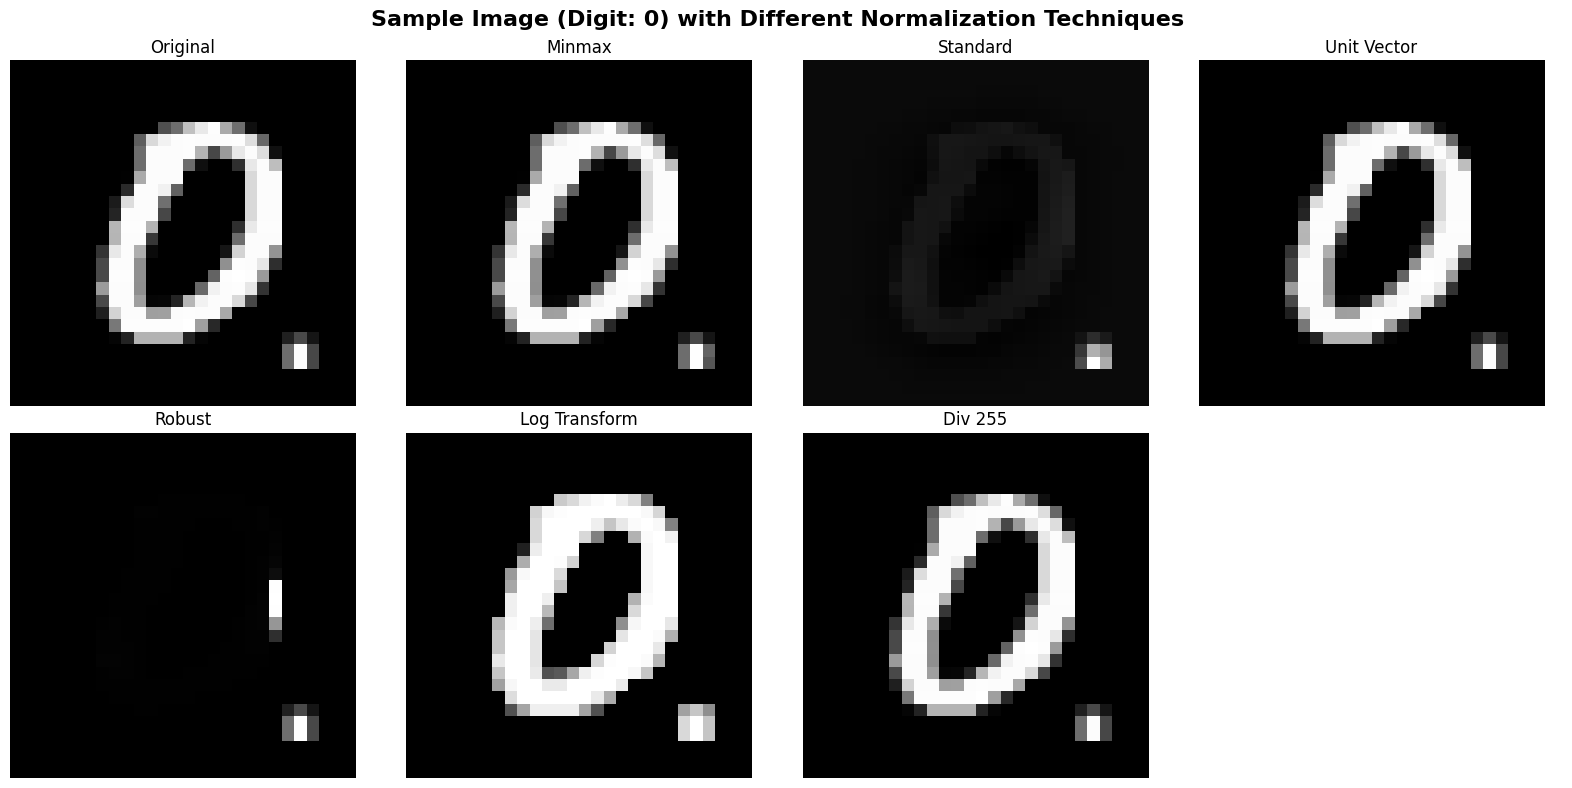

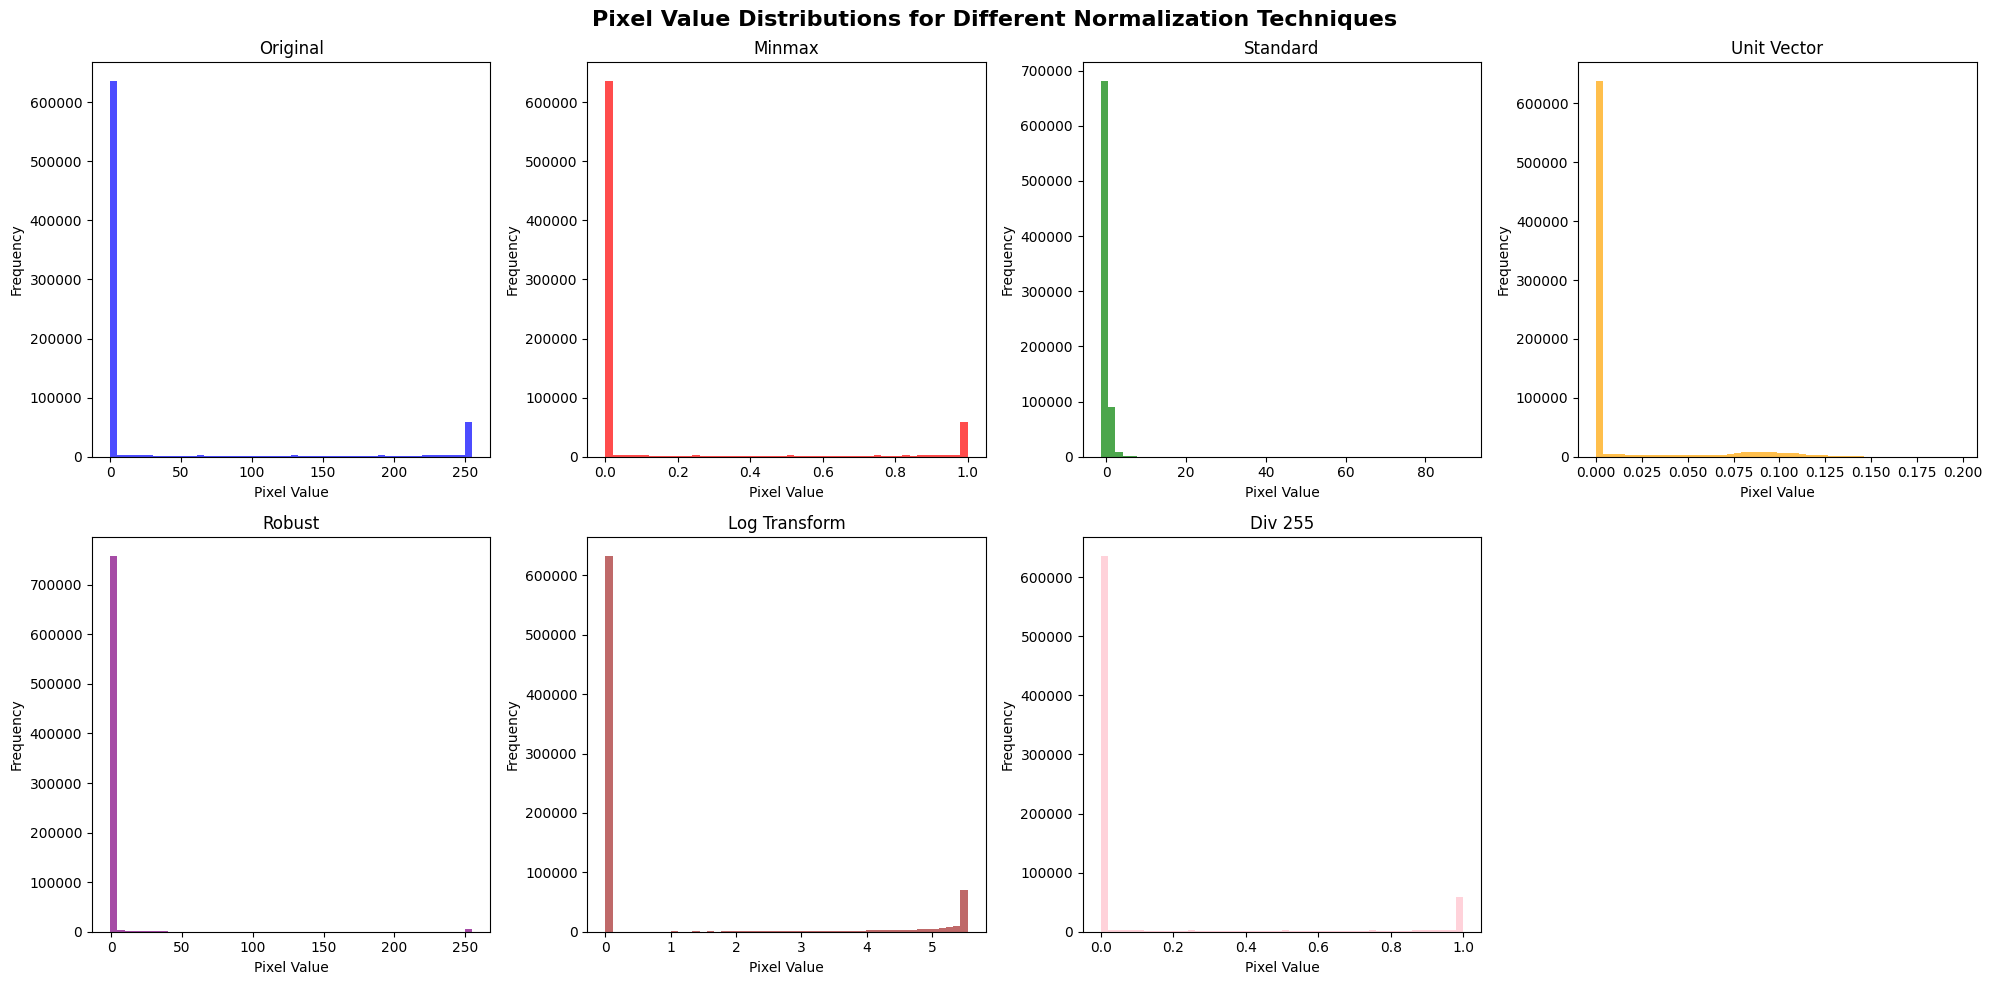

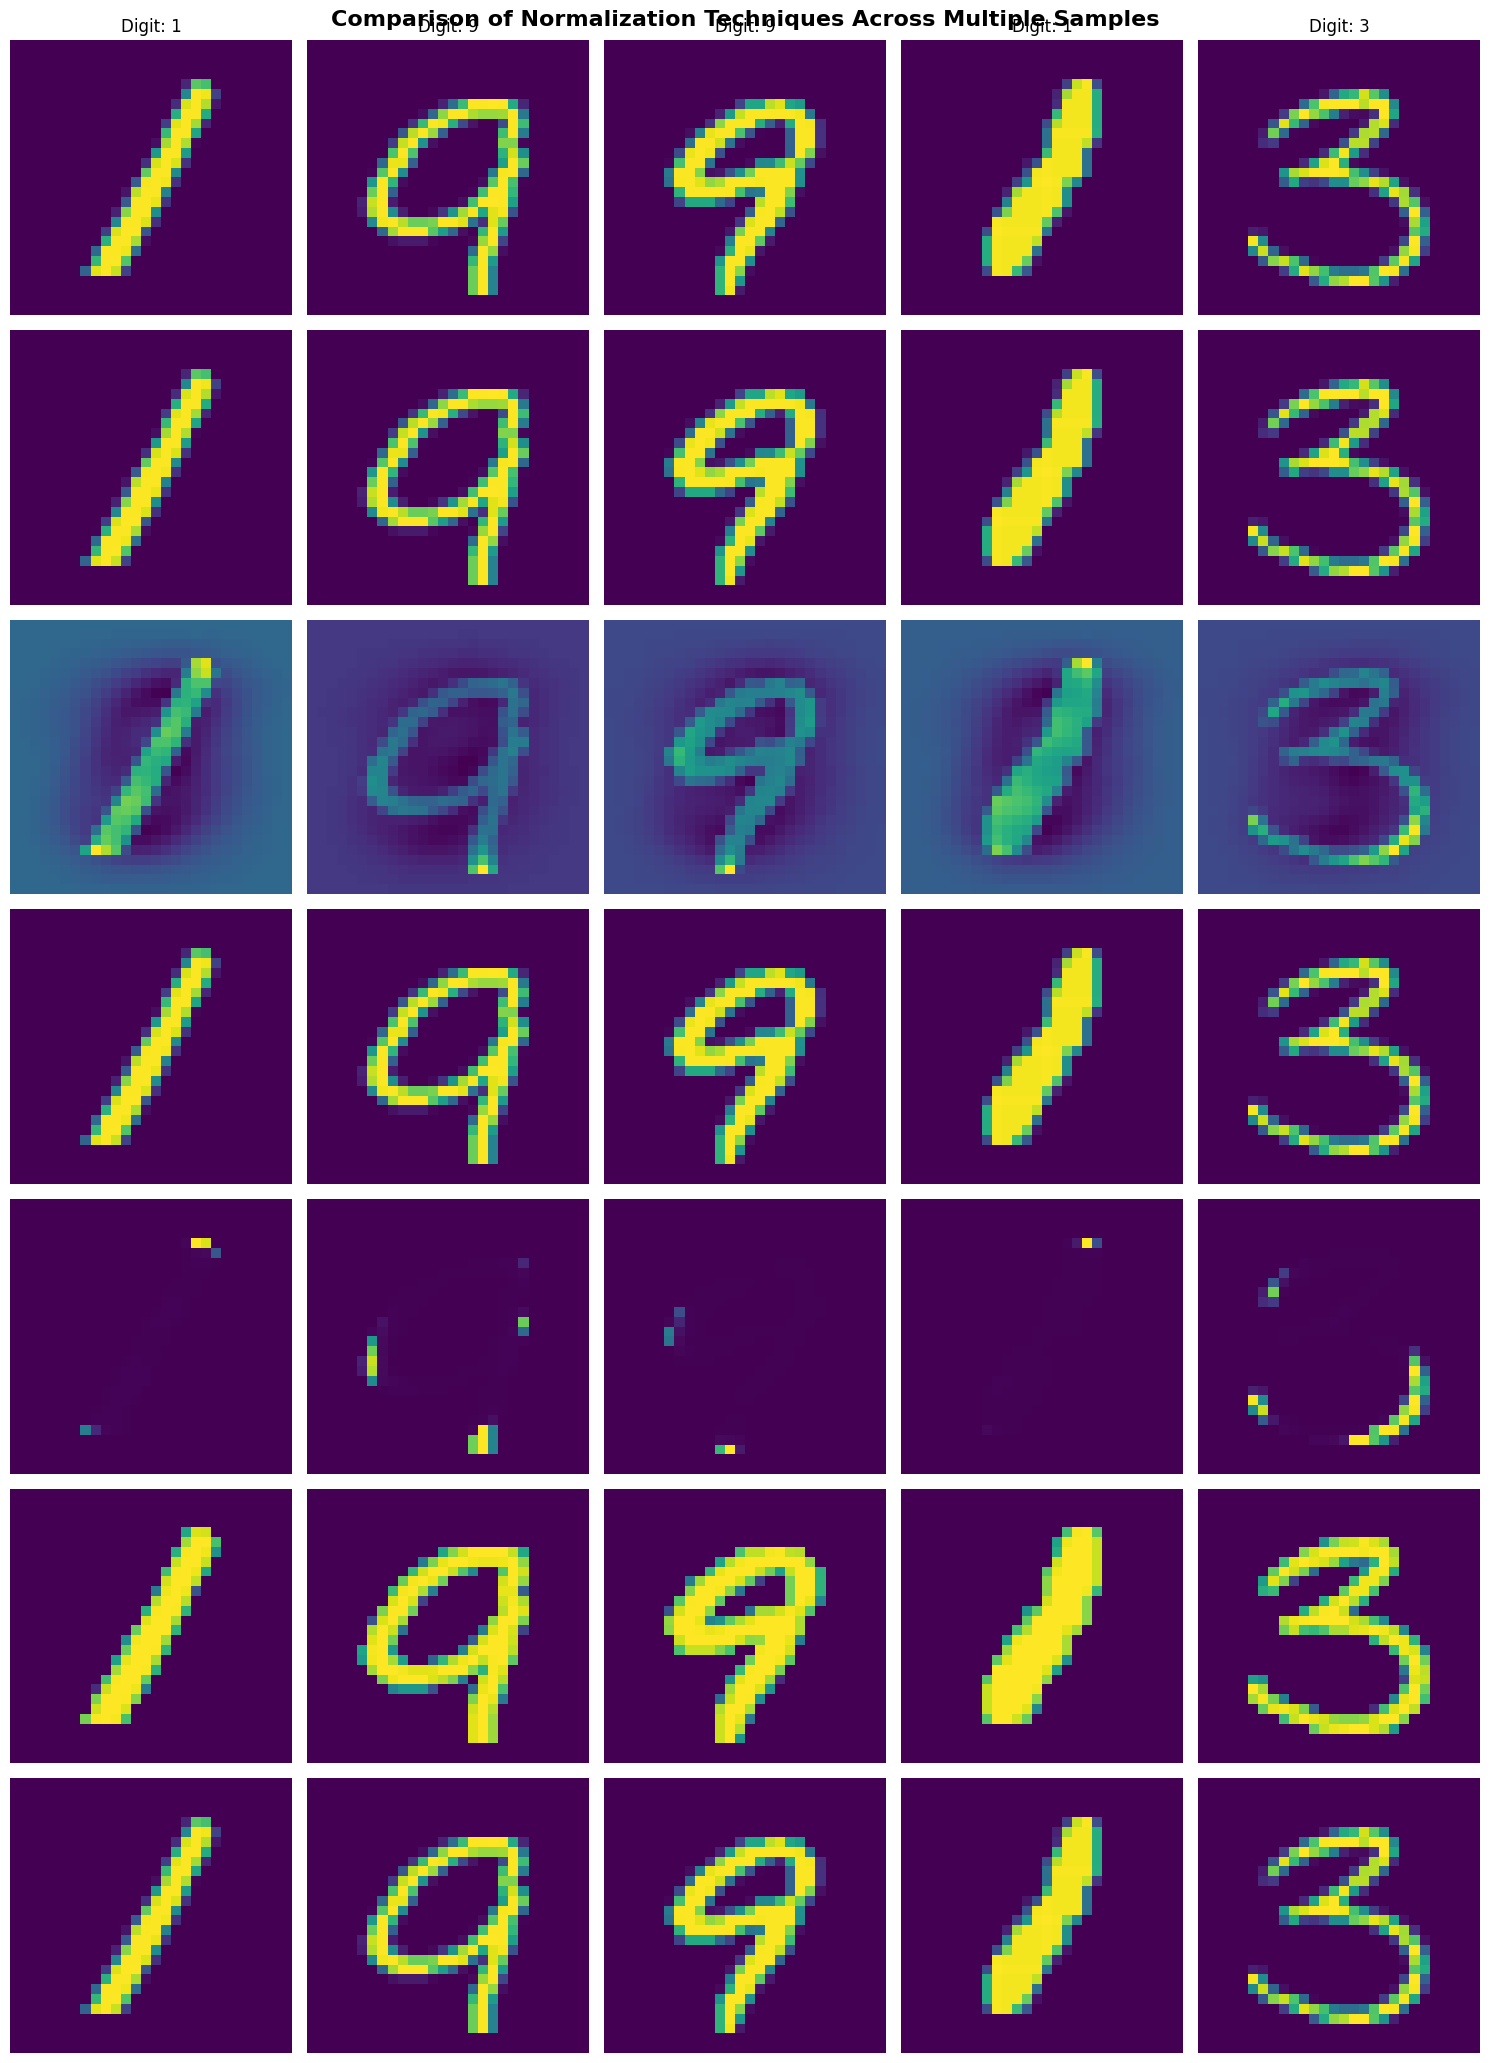


SAMPLE DATA INSPECTION

Sample 1 (Digit: 0):
Original first 10 pixels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
minmax       first 10 pixels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
standard     first 10 pixels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
unit_vector  first 10 pixels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
robust       first 10 pixels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
log_transform first 10 pixels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
div_255      first 10 pixels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Sample 2 (Digit: 2):
Original first 10 pixels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
minmax       first 10 pixels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
standard     first 10 pixels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
unit_vector  first 10 pixels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
robust       first 10 pixels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
log_transform first 10 pixels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
div_255      first 10 pixels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Sample 3 (Digit: 9):
Original first 10 pixels: [0. 0. 0. 0. 0. 0. 0. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import (
    MinMaxScaler, 
    StandardScaler, 
    RobustScaler, 
    Normalizer
)
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

class MNISTNormalizationAnalysis:
    def __init__(self):
        self.X_original = None
        self.y = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.scalers = {}
        self.scaled_data = {}
        
    def load_and_preprocess_data(self):
        """Load MNIST dataset and perform basic preprocessing"""
        print("Loading MNIST dataset...")
        
        # Load MNIST dataset
        mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
        X, y = mnist.data, mnist.target.astype(int)
        
        # Take a subset for demonstration (first 10000 samples)
        X = X[:10000]
        y = y[:10000]
        
        # Basic preprocessing
        # Convert to float32 for memory efficiency
        X = X.astype(np.float32)
        
        # Store original data
        self.X_original = X.copy()
        self.y = y
        
        # Split into train and test sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        print(f"Dataset shape: {X.shape}")
        print(f"Training set: {self.X_train.shape}")
        print(f"Test set: {self.X_test.shape}")
        print(f"Pixel value range: [{X.min():.2f}, {X.max():.2f}]")
        
        return self
    
    def apply_normalization_techniques(self):
        """Apply various normalization and scaling techniques"""
        
        # 1. Min-Max Scaling (0-1 normalization)
        print("\n1. Applying Min-Max Scaling...")
        minmax_scaler = MinMaxScaler()
        X_train_minmax = minmax_scaler.fit_transform(self.X_train)
        X_test_minmax = minmax_scaler.transform(self.X_test)
        
        self.scalers['minmax'] = minmax_scaler
        self.scaled_data['minmax'] = {
            'train': X_train_minmax,
            'test': X_test_minmax,
            'description': 'Min-Max Scaling (0-1 range)'
        }
        
        # 2. Standardization (Z-score normalization)
        print("2. Applying Standardization...")
        standard_scaler = StandardScaler()
        X_train_standard = standard_scaler.fit_transform(self.X_train)
        X_test_standard = standard_scaler.transform(self.X_test)
        
        self.scalers['standard'] = standard_scaler
        self.scaled_data['standard'] = {
            'train': X_train_standard,
            'test': X_test_standard,
            'description': 'Standardization (Z-score, mean=0, std=1)'
        }
        
        # 3. Unit Vector Normalization (L2 normalization)
        print("3. Applying Unit Vector Normalization...")
        unit_normalizer = Normalizer(norm='l2')
        X_train_unit = unit_normalizer.fit_transform(self.X_train)
        X_test_unit = unit_normalizer.transform(self.X_test)
        
        self.scalers['unit_vector'] = unit_normalizer
        self.scaled_data['unit_vector'] = {
            'train': X_train_unit,
            'test': X_test_unit,
            'description': 'Unit Vector Normalization (L2 norm)'
        }
        
        # 4. Robust Scaling
        print("4. Applying Robust Scaling...")
        robust_scaler = RobustScaler()
        X_train_robust = robust_scaler.fit_transform(self.X_train)
        X_test_robust = robust_scaler.transform(self.X_test)
        
        self.scalers['robust'] = robust_scaler
        self.scaled_data['robust'] = {
            'train': X_train_robust,
            'test': X_test_robust,
            'description': 'Robust Scaling (median and IQR)'
        }
        
        # 5. Log Transformation (adding 1 to avoid log(0))
        print("5. Applying Log Transformation...")
        X_train_log = np.log1p(self.X_train)  # log(1 + x)
        X_test_log = np.log1p(self.X_test)
        
        self.scaled_data['log_transform'] = {
            'train': X_train_log,
            'test': X_test_log,
            'description': 'Log Transformation (log(1 + x))'
        }
        
        # 6. Simple Division by 255 (common for image data)
        print("6. Applying Simple Division by 255...")
        X_train_div255 = self.X_train / 255.0
        X_test_div255 = self.X_test / 255.0
        
        self.scaled_data['div_255'] = {
            'train': X_train_div255,
            'test': X_test_div255,
            'description': 'Division by 255 (0-1 range for images)'
        }
        
        return self
    
    def compare_statistics(self):
        """Compare statistical properties of different scaling techniques"""
        
        print("\n" + "="*80)
        print("STATISTICAL COMPARISON OF NORMALIZATION TECHNIQUES")
        print("="*80)
        
        # Create comparison dataframe
        comparison_data = []
        
        # Original data statistics
        comparison_data.append({
            'Technique': 'Original',
            'Min': self.X_train.min(),
            'Max': self.X_train.max(),
            'Mean': self.X_train.mean(),
            'Std': self.X_train.std(),
            'Median': np.median(self.X_train),
            'Q1': np.percentile(self.X_train, 25),
            'Q3': np.percentile(self.X_train, 75)
        })
        
        # Scaled data statistics
        for name, data in self.scaled_data.items():
            X_scaled = data['train']
            comparison_data.append({
                'Technique': name,
                'Min': X_scaled.min(),
                'Max': X_scaled.max(),
                'Mean': X_scaled.mean(),
                'Std': X_scaled.std(),
                'Median': np.median(X_scaled),
                'Q1': np.percentile(X_scaled, 25),
                'Q3': np.percentile(X_scaled, 75)
            })
        
        df_comparison = pd.DataFrame(comparison_data)
        print(df_comparison.round(4))
        
        return df_comparison
    
    def visualize_sample_images(self):
        """Visualize sample images with different normalization techniques"""
        
        # Select a sample image
        sample_idx = 0
        sample_image_original = self.X_train[sample_idx].reshape(28, 28)
        sample_label = self.y_train[sample_idx]
        
        # Create subplots
        fig, axes = plt.subplots(2, 4, figsize=(16, 8))
        fig.suptitle(f'Sample Image (Digit: {sample_label}) with Different Normalization Techniques', 
                     fontsize=16, fontweight='bold')
        
        # Original image
        axes[0, 0].imshow(sample_image_original, cmap='gray')
        axes[0, 0].set_title('Original')
        axes[0, 0].axis('off')
        
        # Plot normalized images
        techniques = ['minmax', 'standard', 'unit_vector', 'robust', 'log_transform', 'div_255']
        positions = [(0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2)]
        
        for i, (technique, pos) in enumerate(zip(techniques, positions)):
            sample_normalized = self.scaled_data[technique]['train'][sample_idx].reshape(28, 28)
            axes[pos].imshow(sample_normalized, cmap='gray')
            axes[pos].set_title(f'{technique.replace("_", " ").title()}')
            axes[pos].axis('off')
        
        # Hide the last subplot
        axes[1, 3].axis('off')
        
        plt.tight_layout()
        plt.show()
        
    def visualize_distributions(self):
        """Visualize pixel value distributions for different techniques"""
        
        # Sample a subset of pixels for visualization
        pixel_sample_size = 1000
        sample_indices = np.random.choice(self.X_train.shape[0], pixel_sample_size, replace=False)
        
        fig, axes = plt.subplots(2, 4, figsize=(20, 10))
        fig.suptitle('Pixel Value Distributions for Different Normalization Techniques', 
                     fontsize=16, fontweight='bold')
        
        # Original distribution
        axes[0, 0].hist(self.X_train[sample_indices].flatten(), bins=50, alpha=0.7, color='blue')
        axes[0, 0].set_title('Original')
        axes[0, 0].set_xlabel('Pixel Value')
        axes[0, 0].set_ylabel('Frequency')
        
        # Plot distributions for each technique
        techniques = ['minmax', 'standard', 'unit_vector', 'robust', 'log_transform', 'div_255']
        positions = [(0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2)]
        colors = ['red', 'green', 'orange', 'purple', 'brown', 'pink']
        
        for technique, pos, color in zip(techniques, positions, colors):
            data = self.scaled_data[technique]['train'][sample_indices].flatten()
            axes[pos].hist(data, bins=50, alpha=0.7, color=color)
            axes[pos].set_title(f'{technique.replace("_", " ").title()}')
            axes[pos].set_xlabel('Pixel Value')
            axes[pos].set_ylabel('Frequency')

        axes[1, 3].axis('off')
        
        plt.tight_layout()
        plt.show()
    
    def create_comparison_heatmap(self):
        """Create a heatmap comparing different normalization techniques"""
        
        # Sample some images for comparison
        sample_size = 5
        sample_indices = np.random.choice(self.X_train.shape[0], sample_size, replace=False)
        
        techniques = ['original'] + list(self.scaled_data.keys())
        
        fig, axes = plt.subplots(len(techniques), sample_size, figsize=(15, 3*len(techniques)))
        fig.suptitle('Comparison of Normalization Techniques Across Multiple Samples', 
                     fontsize=16, fontweight='bold')
        
        for i, idx in enumerate(sample_indices):
            # Original
            original_img = self.X_train[idx].reshape(28, 28)
            axes[0, i].imshow(original_img, cmap='viridis', aspect='auto')
            if i == 0:
                axes[0, i].set_ylabel('Original', fontsize=12, fontweight='bold')
            axes[0, i].set_title(f'Digit: {self.y_train[idx]}')
            axes[0, i].axis('off')
            
            # Normalized versions
            for j, technique in enumerate(self.scaled_data.keys(), 1):
                normalized_img = self.scaled_data[technique]['train'][idx].reshape(28, 28)
                axes[j, i].imshow(normalized_img, cmap='viridis', aspect='auto')
                if i == 0:
                    axes[j, i].set_ylabel(technique.replace('_', ' ').title(), 
                                        fontsize=12, fontweight='bold')
                axes[j, i].axis('off')
        
        plt.tight_layout()
        plt.show()
    
    def analyze_technique_effects(self):
        """Analyze the effects of different normalization techniques"""
        
        print("\n" + "="*80)
        print("ANALYSIS OF NORMALIZATION TECHNIQUE EFFECTS")
        print("="*80)
        
        for name, data in self.scaled_data.items():
            print(f"\n{data['description']}:")
            X_scaled = data['train']
            
            # Calculate various metrics
            sparsity = np.mean(X_scaled == 0) * 100
            range_span = X_scaled.max() - X_scaled.min()
            
            print(f"  - Data Range: [{X_scaled.min():.4f}, {X_scaled.max():.4f}]")
            print(f"  - Range Span: {range_span:.4f}")
            print(f"  - Mean: {X_scaled.mean():.4f}")
            print(f"  - Standard Deviation: {X_scaled.std():.4f}")
            print(f"  - Sparsity (% zeros): {sparsity:.2f}%")
            
            # Check for specific properties
            if name == 'standard':
                print(f"  - Mean ≈ 0: {abs(X_scaled.mean()) < 1e-10}")
                print(f"  - Std ≈ 1: {abs(X_scaled.std() - 1) < 1e-10}")
            elif name == 'minmax' or name == 'div_255':
                print(f"  - Min = 0: {X_scaled.min() == 0}")
                print(f"  - Max ≤ 1: {X_scaled.max() <= 1}")
            elif name == 'unit_vector':
                # Check if each row has unit norm
                norms = np.linalg.norm(X_scaled, axis=1)
                print(f"  - Row norms ≈ 1: {np.allclose(norms, 1)}")
                print(f"  - Average row norm: {norms.mean():.6f}")
    
    def save_sample_data(self):
        """Save sample normalized data for inspection"""
        
        # Save a few samples of each normalization technique
        sample_indices = [0, 1, 2]  # First 3 samples
        
        print("\n" + "="*80)
        print("SAMPLE DATA INSPECTION")
        print("="*80)
        
        for idx in sample_indices:
            print(f"\nSample {idx + 1} (Digit: {self.y_train[idx]}):")
            print(f"Original first 10 pixels: {self.X_train[idx][:10]}")
            
            for name, data in self.scaled_data.items():
                normalized_pixels = data['train'][idx][:10]
                print(f"{name:12} first 10 pixels: {normalized_pixels}")
    
    def run_complete_analysis(self):
        """Run the complete analysis pipeline"""
        
        print("Starting MNIST Normalization Techniques Analysis")
        print("="*60)
        
        # Load and preprocess data
        self.load_and_preprocess_data()
        
        # Apply all normalization techniques
        self.apply_normalization_techniques()
        
        # Compare statistics
        comparison_df = self.compare_statistics()
        
        # Analyze technique effects
        self.analyze_technique_effects()
        
        # Visualizations
        print("\nGenerating visualizations...")
        self.visualize_sample_images()
        self.visualize_distributions()
        self.create_comparison_heatmap()
        
        # Save sample data for inspection
        self.save_sample_data()
        
        print("\n" + "="*80)
        print("ANALYSIS COMPLETE!")
        print("="*80)
        
        return comparison_df

# Usage example
if __name__ == "__main__":
    # Create analyzer instance
    analyzer = MNISTNormalizationAnalysis()
    
    # Run complete analysis
    comparison_results = analyzer.run_complete_analysis()
    
    # Additional utility: Function to normalize new data using fitted scalers
    def normalize_new_data(new_data, technique_name, analyzer):
        """Normalize new data using pre-fitted scalers"""
        if technique_name in analyzer.scalers:
            return analyzer.scalers[technique_name].transform(new_data)
        elif technique_name == 'log_transform':
            return np.log1p(new_data)
        elif technique_name == 'div_255':
            return new_data / 255.0
        else:
            raise ValueError(f"Unknown technique: {technique_name}")
    
    print("\nExample of normalizing new data:")
    # Take a sample from test set
    new_sample = analyzer.X_test[:5]  # First 5 test samples
    
    # Normalize using different techniques
    for technique in ['minmax', 'standard', 'robust']:
        normalized = normalize_new_data(new_sample, technique, analyzer)
        print(f"{technique}: range [{normalized.min():.4f}, {normalized.max():.4f}]")